In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [2]:
# from HFC32_emimTf2N_PR import configuration
from HFC32_emimTf2N_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R32_emimTf2N.csv')
# print(data)

In [4]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]

# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)

# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)

# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)


In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-06 14:16:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


# T = 283 K

In [6]:
print(data_283)

   temperature  pressure  x_R32  x_emimTf2N
0       283.15     10200  0.014       0.986
1       283.15    100100  0.136       0.864
2       283.15    250300  0.306       0.694
3       283.15    399300  0.448       0.552
4       283.15    549300  0.570       0.430
5       283.15    700400  0.672       0.328
6       283.15    849400  0.786       0.214


In [7]:
binary_params_peng(data_283, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  283.1, init_press =   399300 , init_x_c1 =    0.448, init_x_c2 = 0.552,
    init_kappa_2_1 = -0.03479509, init_kappa_1_2 = -0.015923346845, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-06 14:16:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:16:48 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:16:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:16:48 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:16:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:16:49 [INFO] idaes.init.fs.state_

In [8]:
k12_283 = -0.0208920791297406
k21_283 = -0.029764818469326954

In [9]:
R32_x,P= calc_outlet_xP(data,m,"R32", "emimTf2N", k21_283, k12_283,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


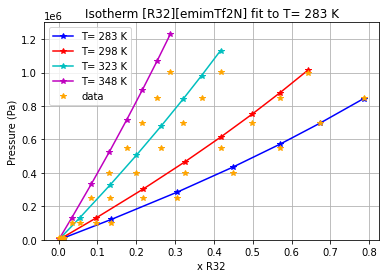

In [10]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTf2N] fit to T= 283 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1300000)
plt.legend()
plt.show()

#  T = 298 K

In [11]:
print(data_298)

   temperature  pressure  x_R32  x_emimTf2N
0       298.15      9600  0.010       0.990
1       298.15     99800  0.095       0.905
2       298.15    250200  0.218       0.782
3       298.15    399400  0.325       0.675
4       298.15    549400  0.417       0.583
5       298.15    699500  0.499       0.501
6       298.15    849500  0.570       0.430
7       298.15    999700  0.643       0.357


In [12]:
binary_params_peng(data_298, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_2_1 = k21_283, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-06 14:17:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:17:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:17:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:19 [INFO] idaes.init.fs.state_

In [13]:
k12_298 = -0.020109912245191205
k21_298 = -0.016572152505313225

In [14]:
R32_x,P= calc_outlet_xP(data,m,"R32", "emimTf2N", k21_298, k12_298,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

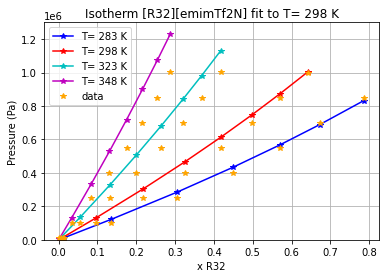

In [15]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTf2N] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1300000)
plt.legend()
plt.show()

# T = 323 K

In [16]:
print(data_323)

   temperature  pressure  x_R32  x_emimTf2N
0       323.15     10200  0.005       0.995
1       323.15    100300  0.055       0.945
2       323.15    249700  0.133       0.867
3       323.15    400100  0.200       0.800
4       323.15    549500  0.264       0.736
5       323.15    700300  0.320       0.680
6       323.15    850400  0.368       0.632
7       323.15   1000400  0.417       0.583


In [17]:
binary_params_peng(data_323, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  323.15, init_press =   400100 , init_x_c1 =    0.200, init_x_c2 = 0.800,
    init_kappa_2_1 = k21_298, init_kappa_1_2 = k12_298, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-06 14:17:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:48 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:17:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:48 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:17:48 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:17:49 [INFO] idaes.init.fs.state_

In [18]:
k12_323 = -0.01895792530906956
k21_323 = -0.002792598704415786

In [19]:
R32_x,P= calc_outlet_xP(data,m,"R32", "emimTf2N", k21_323, k12_323,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

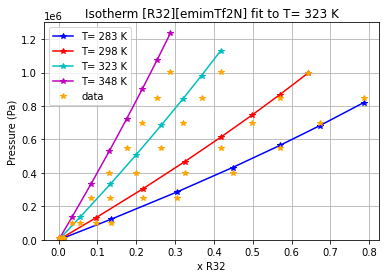

In [20]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTf2N] fit to T= 323 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1300000)
plt.legend()
plt.show()

# T = 348 K

In [21]:
print(data_348)

   temperature  pressure  x_R32  x_emimTf2N
0       348.05     10300  0.002       0.998
1       348.05     99800  0.034       0.966
2       348.05    249700  0.084       0.916
3       348.05    399500  0.131       0.869
4       348.05    550300  0.175       0.825
5       348.05    699200  0.216       0.784
6       348.05    850400  0.254       0.746
7       348.05   1000500  0.288       0.712


In [22]:
binary_params_peng(data_348, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  348.05, init_press =   399500 , init_x_c1 =    0.131, init_x_c2 = 0.869,
    init_kappa_2_1 = k21_323, init_kappa_1_2 = k12_323, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-06 14:18:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:18:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:18:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:18:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:18:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:18:19 [INFO] idaes.init.fs.state_

In [23]:
k12_348 = -0.018344963104707162
k21_348 = 0.014152316681532398

In [24]:
R32_x,P= calc_outlet_xP(data,m,"R32", "emimTf2N", k21_348, k12_348,verbose=True)

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

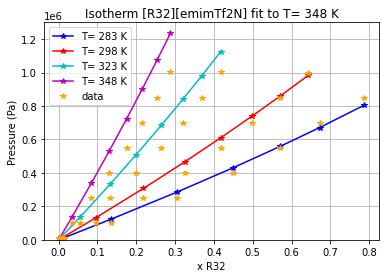

In [25]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTf2N] fit to T= 348 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1300000)
plt.legend()
plt.show()

# Kappas vs T 

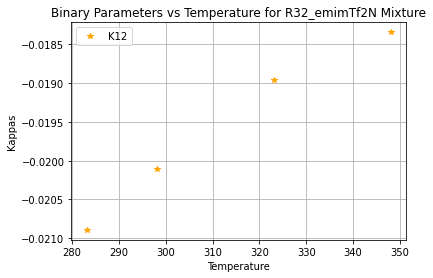

K12 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.02089208 -0.02010991 -0.01895793 -0.01834496]


In [26]:
K12 = np.array([k12_283, k12_298, k12_323, k12_348])
T = np.array([283.1, 298.1, 323.1, 348.1]) #K
plt.plot(T,K12,"*",color='orange',label="K12") 
plt.title('Binary Parameters vs Temperature for R32_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K12 Values for T= ', T, 'are: ')
print(K12)

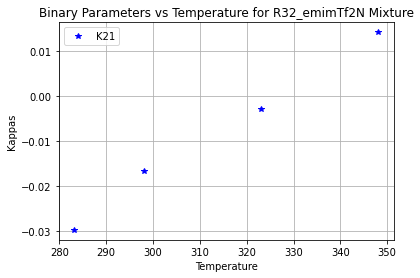

K21 Values for T=  [283.1 298.1 323.1 348.1] are: 
[-0.02976482 -0.01657215 -0.0027926   0.01415232]


In [27]:
K21 = np.array([k21_283, k21_298, k21_323, k21_348])
plt.plot(T,K21,"*",color='blue',label="K21")
plt.title('Binary Parameters vs Temperature for R32_emimTf2N Mixture')
plt.ylabel('Kappas')
plt.xlabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

print('K21 Values for T= ', T, 'are: ')
print(K21)

# Best Fit

In [28]:
binary_params_peng(data, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_2_1 = k21_283, init_kappa_1_2 = k12_283, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-06 14:20:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:20:54 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:20:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:20:54 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:20:54 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:20:55 [INFO] idaes.init.fs.state_

2021-04-06 14:21:00 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:21:00 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:21:00 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:21:01 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-06 14:21:01 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-06 14:21:01 [INFO] idaes.init.fs.state_

In [ ]:
k12 = -0.02437281139381565
k21 = -0.08519540502907186

In [ ]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:7],P[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:],P[23:],"m*-",label="T= 348 K")
plt.plot(data["x_R32"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R32][emimTf2N] fit to T= 348 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1300000)
plt.legend()
plt.show()